## Why spending two classes on regression and fitting?

### Order of the class
* justification of using fitting
* recap on distribution (gaussian/normal)
* Ideal gas and Maxwell-Boltzmann distribution
* finding temperature of the ideal gas using fitting (scipy.curve_fit)

## Dictionary:
* bell shape
* reach
* describe
* useful
* knowledge
* anticipate

In the last class we used random numbers to generate the histogram of this bell shape

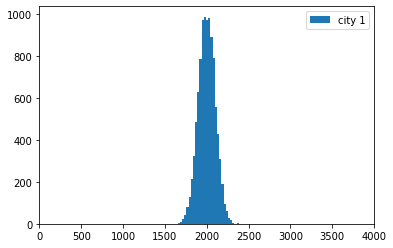

In [1]:
import matplotlib.pyplot as plt
import numpy as np
mu1,sigma1 = 2000,100.0
s_normal = np.random.normal(mu1, sigma1, 10000)
fig,ax=plt.subplots(1,1)
bins=30
myhist, bin_edges=np.histogram(s_normal,bins=31)
#print(bin_edges)
amp=np.max(myhist)
ax.hist(s_normal,bins=bins,label='city 1')
ax.set_xlim(0,2*mu1)
ax.legend()

this distribution has name: Gaussian distribution or normal distribution
and there is a corresponding equation to describe it: In the most general form:

Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

* A is the amplitude
* $\bar{x}$ is the mean value
* $\sigma$ is the spread (width) of the distribution

why there is $(x-\bar{x})$?
if variable $x$ is exactly equal the expected value (mean) the exponens becomes zero and the distribution reaches maximum g=A 

### Lets go back to the histogram
for the histogram we used: 
mu1,sigma1 = 2000,100.0,

We can try to reproduce the histogram using the gaussian function:

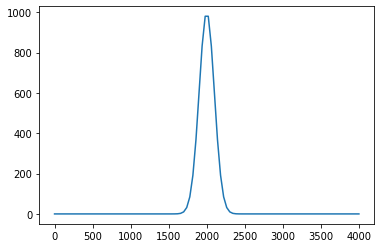

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma=100
x0=2000
A=1000
x=np.linspace(0,4000,100)
g=A*np.exp(-0.5*(x-x0)**2/sigma**2)
fig,ax=plt.subplots(1,1)
ax.plot(x,g)

lets compare:

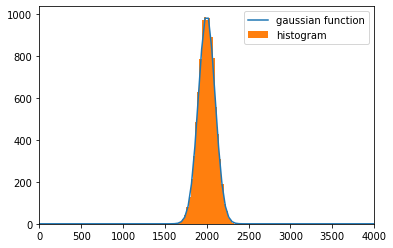

In [3]:
fig,ax=plt.subplots(1,1)
ax.plot(x,g,label='gaussian function')
bins=30
ax.hist(s_normal,bins,label='histogram')
ax.set_xlim(0,2*mu1)
ax.legend()

## How is this useful?
Well, if we know the function describing the process we can do fit the data and obtain the parameters of the function here: $A,\mu,\sigma$

So lets reverse the problem, Imagine that you dont know the widht of this histogram. How can you find it?
* we know that this distribution is described by a gaussian function
* we can fit it!

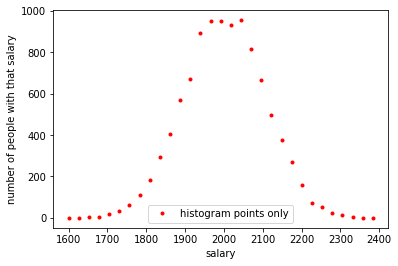

In [14]:
# Just generating points same as on the histogram
myhist, bin_edges=np.histogram(s_normal,bins=31)
x=np.linspace(bin_edges[0],bin_edges[-1],len(myhist))
# plotting the points
fig,ax=plt.subplots(1,1)
ax.plot(x,myhist,'.r',label='histogram points only')
ax.set_xlabel('salary')
ax.set_ylabel('number of people with that salary')
ax.legend()

The distribution has a shape of the gaussian function

Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

We can ask the curve_fit to adjust parameters: A,$\mu$, $\sigma$ in such a way that they match the points:

In [15]:
from scipy.optimize import curve_fit

def fittingGauss1D(x,A,sigma,mc):
    g= A*np.exp(-(x-mc)**2.0 / (2.0*(sigma**2.0)))
    return g

p0=[1000,100,2000]
coeffs2, matcov2 = curve_fit(fittingGauss1D, x, myhist, p0,method='lm')

A=np.abs(coeffs2[0])
sigma=np.abs(coeffs2[1])
mu=np.abs(coeffs2[2])
myfit=fittingGauss1D(x,A,sigma,mu)

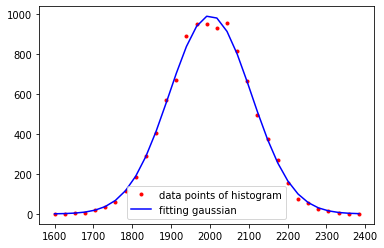

In [16]:
fig,ax=plt.subplots(1,1)
ax.plot(x,myhist,'.r',label='data points of histogram')
ax.plot(x,myfit,'-b',label='fitting gaussian')
ax.legend()

In [17]:
#According to the fitting:
print(sigma)
print(mu)
print(A)

105.38373672843477
2001.0892959811742
993.3134263971277


* finding $\mu$, $\sigma$ can be useful !!

## Ideal gas, velocity distribution of the particles: Maxwell-Boltzmann distribution - real life problem

It is impossible to do
astrophysics without some basic knowledge of the
laws of thermodynamics and statistical physics,
we will anticipate some of the results from later
courses already.

http://fisica.udea.edu.co:8080/IdealGas

Maxwell-Boltzmann velocity distribution can be written:

$$P(v)=\left(\frac{m}{2\pi k_B T}\right)^{3/2}e^{-\frac{1}{2} \frac{m v^2}{k_B T}}$$

in one direction:

$$P(v)=\sqrt{\frac{m}{2\pi k_B T}}e^{-\frac{1}{2} \frac{m v^2}{k_B T}}$$

(here $k_B$ is Boltmann’s constant) giving the probability that a gas particle with mass m in a gas with temperature T has the velocity v. This is the vector form of the Maxwell Boltzmann distribution. It might not be directly evident that this is a Gaussian distribution.

$$P(v)=\sqrt{\frac{1}{2\pi \sigma^2}}e^{-\frac{1}{2} \frac{v^2}{\sigma^2}}$$

where $\sigma=\sqrt{\frac{kT}{m}}$

<table><tr>
<td> <img src="imgs/MB_distribution_temp.jpg" width="300" /> </td>
</tr></table>

In practice we deal with the distribution of the number of particles with given velocity:

$$f_N=f_{max} e^{-\frac{1}{2} \frac{ v^2}{\sigma^2}}$$




And this can be described by gaussian function:
Gaussian distribution: $$g(x)=Ae^{-\frac{1}{2} \frac{(x-\bar{x})^2}{\sigma^2}}$$

So if we know the distribution, we can do the fit to obtain $\sigma$
and from that the temperatures follows to be: 
$$ T=\frac{m\sigma^2}{k_B}$$

### Example

Lets imagine we have collected the velocities of the atoms from this simulations: http://fisica.udea.edu.co:8080/IdealGas

In [8]:
import pandas as pd

In [9]:
df =pd.read_csv('NvsV.csv',delimiter=',')
df[20:25]

,velocity [m/s],Natoms
20,303.030303,56.111011
21,318.181818,69.256456
22,333.333333,84.801706
23,348.484848,103.010403
24,363.636364,124.133712


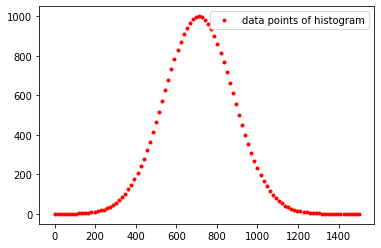

In [10]:
fig,ax=plt.subplots(1,1)
ax.plot(df['velocity [m/s]'],df['Natoms'],'.r',label='data points of histogram')
ax.legend()

In [11]:
from scipy.optimize import curve_fit

def fittingGauss1D(x,A,sigma,mc):
    g= A*np.exp(-(x-mc)**2.0 / (2.0*(sigma**2.0)))
    return g

p0=[1000,200,700]
coeffs2, matcov2 = curve_fit(fittingGauss1D, df['velocity [m/s]'], df['Natoms'], p0,method='lm')
A=np.abs(coeffs2[0])
sigma=np.abs(coeffs2[1])
mu=np.abs(coeffs2[2])
myfit2=fittingGauss1D(df['velocity [m/s]'],A,sigma,mu)

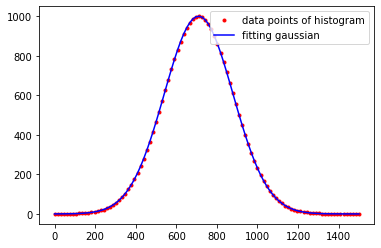

In [12]:
fig,ax=plt.subplots(1,1)
ax.plot(df['velocity [m/s]'],df['Natoms'],'.r',label='data points of histogram')
ax.plot(df['velocity [m/s]'],myfit2,'-b',label='fitting gaussian')
ax.legend()

The temperature can be obtained from the sigma:
$$ T=\frac{m\sigma^2}{k_B}$$

In [13]:
kB=1.38e-23
T=300
m=1.44e-25
T=m*sigma**2/kB
print(T,'[K]')

300.00000000000006 [K]
